# Example 1. Majority Voting Aggregation
---
The **Majortiy voting Aggregation** is a typical way to ensemble all the possible model to a powerful classifier or regression fitter. The essential concept is caculating the maximum votes and the highest possible prediction from the different models. Here we concentrate the claasification cases with two method of **Majority Voting Method**: **voting classification** and **averaging probability**. The general case of **voting classification** can be defined as

$$
\begin{equation}
\begin{split}
\bar{y}(\mathbf{X})&=\arg\max_{C}\sum_{j=1}^m w_j\chi\left(y_j(\mathbf{X})=C_i\right)\\
&= \arg\max_{C}{\left[N_{C_1}(\mathbf{X}),\ N_{C_2}(\mathbf{X}),\,\cdots,\,N_{C_i}(\mathbf{X}),\,\cdots,\,N_{C_d}(\mathbf{X})\right]}
\end{split}
\end{equation}
$$

where obtains the maximum votes $N_{C_i}$ from the one of all classes $C=\{C_1,\,C_2,\,\cdots,\,C_i,\,\cdots\,\,C_d\}$, where $d$ is the dimension of the classes; the model is denoted as $j$; $m$ is total number of the models; the voting is summing all the predictions of the different models for input data $\mathbf{X}$ and multipling the correspoding the weights $w=\{w_1,\ w_2,\ ...,\ w_m\}$; $\chi$ is a *"characteristic function"* which distributes the output of *"active function"* $y_j(\mathbf{X})$, i.e. the predictions of the model $j$, to its predicted class $C_i$ for summing as

$$
\begin{equation}
N_{C_i}(\mathbf{X})= \sum_{j=1}^m w_j\chi\left(y_j(\mathbf{X})=C_i\right)\ .
\end{equation}
$$

However, in the binary classification, the equation can be simplifed to 

$$
\begin{equation}
\bar{y}(\mathbf{X})=\text{sign}\left(\sum_{j=1}^m w_j \chi\left(y_j(\mathbf{X})=target\ /\ other\right)\right)\ ,
\end{equation}
$$

where the *"characteristic function"* $\chi$ makes the predicted class to be 1 or -1, when $y_j(\mathbf{X})$ predicts $target$ or $other$ class, respectively.  

The anternative way with the view of statistics is **averaging probability** method. It is finding the maximum sum of **bayesian probabilities** of all models for each predicted class which is defined as

$$
\begin{equation}
\begin{split}
\bar{y}(\mathbf{X})&=\arg\max_{C}\sum_{j=1}^{m}{w_jp\left(C_i\mid y_j(\mathbf{X})\right)}\\
&=\arg\max_{C}\left[p\left(C_1\mid\mathbf{X}\right),\ p\left(C_2\mid\mathbf{X}\right),\,\cdots,\,p\left(C_d\mid\mathbf{X}\right)\right]\ ,
\end{split}
\end{equation}
$$

where the all classes are denoted with $C=\{C_1,\,C_2,\,\cdots,\,C_i,\,\cdots\,\,C_d\}$, where $d$ is the dimension of the classes; and

$$
\begin{equation}
p\left(C_i\mid\mathbf{X}\right)= \sum_{j=1}^{m}{w_jp\left(C_i\mid y_j(\mathbf{X})\right)}\ ,
\end{equation}
$$

which represents the probability of the data $\mathbf{X}$ is $C_i$ class. This way can also help us to observe the preformance of model with *ROC* and *AUC*. 

### 1. Ensemble error curve
Here we perform the ensemble (aggregation) error to prove the accuary can be improved by the aggregation with binary classification case. Assume the errors of each classifier are the same and denoted as $\epsilon$, where $0<\epsilon<1$. The total error of the aggregation with $\geq k$ number of total $m$ models is following the **binominal probability distribution** as

$$
\epsilon_{agg}(\geq k) = \sum_{k}^{m}{\dbinom{m}{k}\epsilon^{k}(1-\epsilon)^{(m-k)}}\ ,
$$

where it can also be called **binominal error** here. For **voting classification**, the aggregated (ensembled) prediction is decided by counting the vottes which are above the half of total $m$ models. Thus, we are interested the case $k=\frac{m}{2}$ to observe if the aggregated model has better performance, i.e. $\epsilon_{agg}(\geq \frac{m}{2})$  represent the ensemble error.   

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.misc import comb

In [2]:
# the binomial error as target class is choosen
def ensemble_error(n_classifier, error):
    k_start = math.ceil(n_classifier/2.) 
    probs = [comb(n_classifier, k)*(error**k)*((1-error)**(n_classifier-k)) 
             for k in range(int(k_start), n_classifier+1)]
    return sum(probs)

In [3]:
ensemble_error(n_classifier=11, error=0.25)

0.034327507019042969

In [4]:
error_range = np.arange(0., 1.01, 0.01)
ens_errors = [ensemble_error(n_classifier=11, error=error) for error in error_range]

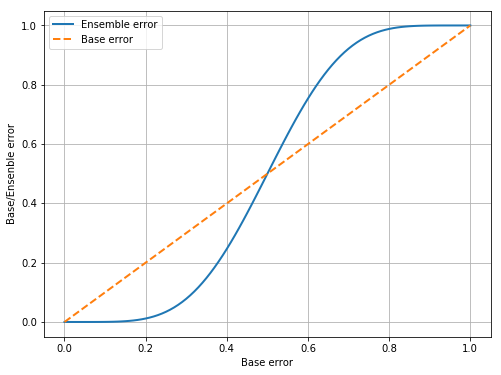

In [5]:
plt.figure(figsize=(8,6))
plt.plot(error_range, ens_errors,  label='Ensemble error', linewidth=2)
plt.plot(error_range, error_range, label='Base error',     linewidth=2, linestyle='--')
plt.xlabel('Base error')
plt.ylabel('Base/Ensenble error')
plt.legend(loc='upper left')
plt.grid()
plt.show()

From above exersice, we know the ensemble error can be smaller than individual model when the classifier's error is lower than 0.5. However, if the classifier's error is higher than 0.5, we can inverse the prediction of this classifier to have error lower than 0.5, e.g. a bad binary model predicts 1 with error 0.6 for a certain data, than it can be inverted to 0 with error 0.4 to have better prediction.

### 2. Iris example of aggregation
#### 2.1. Import package and data

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.preprocessing   import LabelEncoder

In [7]:
le = LabelEncoder()
iris = datasets.load_iris()
X = iris.data[50:, [1,2]]
y = le.fit_transform(iris.target[50:])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

#### 2.2. Train individual model

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model    import LogisticRegression
from sklearn.tree            import DecisionTreeClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.pipeline        import Pipeline
from MajorityVoteClassifier  import *

In [9]:
clf_labels = ['Logistic Regression', 'KNN', 'Decision Tree', 'Majority voting']
clf1 = Pipeline([['sc',  StandardScaler()], 
                 ['clf', LogisticRegression(penalty='l2', C=0.001, random_state=0)]])
clf2 = Pipeline([['sc',  StandardScaler()], 
                 ['clf', KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')]])
clf3 = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)
# Ensemble above classifiers by Majority Voting Method
clf4 = MajorityVoteClassifier([clf1, clf2, clf3])

In [10]:
for clf, label in zip([clf1, clf2, clf3, clf4], clf_labels):
    score = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
    print 'ROC AUC (10-fold x-val): %.2f (+/- %.2f) [%s]'%(score.mean(), score.std(), label)

ROC AUC (10-fold x-val): 0.92 (+/- 0.20) [Logistic Regression]
ROC AUC (10-fold x-val): 0.93 (+/- 0.10) [KNN]
ROC AUC (10-fold x-val): 0.92 (+/- 0.15) [Decision Tree]
ROC AUC (10-fold x-val): 0.97 (+/- 0.10) [Majority voting]


#### 2.3. ROC plot
By using the **average probability** method, we can perform the ROC and caculate AUC scores for comparing the performance of the models. 

In [11]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [12]:
clfs   = [clf1, clf2, clf3, clf4]
colors = ['black', 'orange', 'blue', 'green']
lines  = [':', '--', '-.', '-']

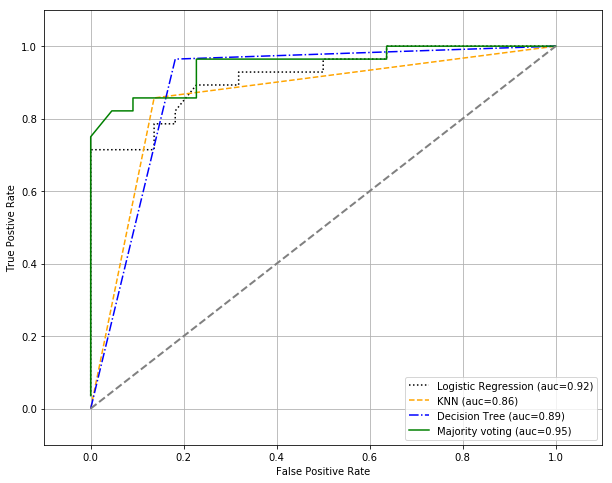

In [13]:
plt.figure(figsize=(10,8))
for clf, label, color, line in zip(clfs, clf_labels, colors, lines):
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]  # output the probability of prediction
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred) # get roc by the thresholds of probability
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=color, linestyle=line, label='%s (auc=%.2f)'%(label, roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')
plt.show()

#### 2.4. Visualization of decision regions

In [14]:
from itertools import product

In [15]:
cs = StandardScaler()
X_train_std = cs.fit_transform(X_train)

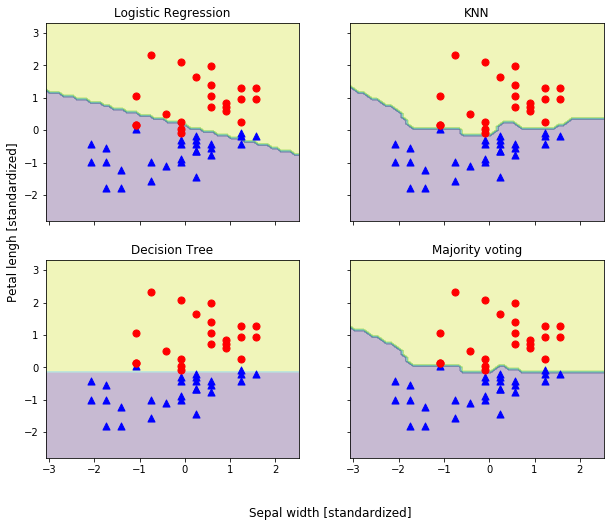

In [16]:
x_min = X_train_std[:, 0].min() - 1
x_max = X_train_std[:, 0].max() + 1
y_min = X_train_std[:, 1].min() - 1
y_max = X_train_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(nrows=2, ncols=2, sharex='col', sharey='row', figsize=(10,8))
for idx, clf, label in zip(product([0, 1], [0, 1]), clfs, clf_labels):
    clf.fit(X_train_std, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx[0], idx[1]].scatter( X_train_std[y_train==0,0], X_train_std[y_train==0,1], c='blue', marker='^', s=50)
    axarr[idx[0], idx[1]].scatter( X_train_std[y_train==1,0], X_train_std[y_train==1,1], c='red',  marker='o', s=50) 
    axarr[idx[0], idx[1]].set_title(label)
plt.text(-3.5,  -4.5, s='Sepal width [standardized]', ha='center', va='center', fontsize=12)
plt.text(-10.5,  4.5, s='Petal lengh [standardized]', ha='center', va='center', fontsize=12, rotation=90)
plt.show()

#### 2.5. Parameter optimization by Grid search

In [17]:
from sklearn.model_selection import GridSearchCV
# Check params for Grid search
clf4.get_params()

{'decisiontreeclassifier': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=0, splitter='best'),
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 1,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_impurity_split': 1e-07,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2,
 'decisiontreeclassifier__min_weight_fraction_leaf': 0.0,
 'decisiontreeclassifier__presort': False,
 'decisiontreeclassifier__random_state': 0,
 'decisiontreeclassifier__splitter': 'best',
 'pipeline-1': Pipeline(steps=[['sc', StandardScaler(copy=True, with_mean=True, with_

In [18]:
params = {'decisiontreeclassifier__max_depth':[1, 2],
          'pipeline-1__clf__C':[0.001, 0.1, 100]}
grid = GridSearchCV(estimator=clf4, param_grid=params, cv=10, scoring='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=MajorityVoteClassifier(classifiers=[Pipeline(steps=[['sc', StandardScaler(copy=True, with_mean=True, with_std=True)], ['clf', LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solv..._split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')],
            vote='classlabel', weights=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'pipeline-1__clf__C': [0.001, 0.1, 100], 'decisiontreeclassifier__max_depth': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [19]:
# v0.18, different from book -> check grid.cv_results_
cv_results = grid.cv_results_
cv_params  = cv_results['params']
for i, param in enumerate(cv_params):
    print '%.3f+/-%.2f %r'%( cv_results['mean_test_score'][i], cv_results['std_test_score'][i]/2, param)

0.967+/-0.05 {'pipeline-1__clf__C': 0.001, 'decisiontreeclassifier__max_depth': 1}
0.967+/-0.05 {'pipeline-1__clf__C': 0.1, 'decisiontreeclassifier__max_depth': 1}
1.000+/-0.00 {'pipeline-1__clf__C': 100, 'decisiontreeclassifier__max_depth': 1}
0.967+/-0.05 {'pipeline-1__clf__C': 0.001, 'decisiontreeclassifier__max_depth': 2}
0.967+/-0.05 {'pipeline-1__clf__C': 0.1, 'decisiontreeclassifier__max_depth': 2}
1.000+/-0.00 {'pipeline-1__clf__C': 100, 'decisiontreeclassifier__max_depth': 2}


In [20]:
print 'Best parameters: %s'% grid.best_params_
print 'Accuracy (ROC AUC): %.2f'% grid.best_score_

Best parameters: {'pipeline-1__clf__C': 100, 'decisiontreeclassifier__max_depth': 1}
Accuracy (ROC AUC): 1.00
